###### [Home](https://github.com/jorgeo80/UP_MCD/blob/master/MachineLearning/Directorio.md)
# Descenso de Gradiente Estocástico (SGD) 
&emsp;&emsp;$\theta = \theta - \eta * \nabla \theta J( \theta; x(i); y(i))$

## (1) Generamos la función SDG

In [144]:
import numpy as np
import matplotlib.pyplot as plt

def sgd(X, y, eta = 0.01 ,n_iter = 100):
    '''
        función para calcular el Descenso de Gradiente Estocástico
        X = Matriz de X's
        y = Vector de y's
        eta = Tasa de Aprendizaje
        n_iter = Numero de Iteraciones        
    '''
    # Inicializa los parámetros theta
    theta = np.random.rand(X.shape[1])
    m = len(y)
    cost_hist = []    
    theta_hist = []
    for it in range(n_iter):
        cost = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            # thetha_j = thetha_j - eta * (sum(theta * X_i) - y_i) * X_i        
            theta = theta -eta * np.dot(X_i.T, (np.dot(X_i, theta) - y_i))
            # cost_j = (1/2) * sum(theta * X_i)²
            cost += (1 / 2) * (np.dot(X_i, theta) - y_i) ** 2
        cost_hist.append(float(np.asarray(cost))) 
        theta_hist.append(float(np.asarray(theta)))
    return {'theta': float(np.asarray(theta)), 
            'costHistory': cost_hist, 
            'thetaHistory': theta_hist}

## (2) Creamos datos dummy y los graficamos

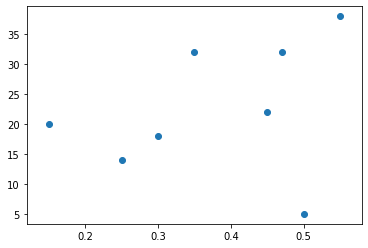

In [148]:
X = np.array([0.5, 0.15, 0.30, 0.25, 0.35, 0.45, 0.47, 0.55]).reshape((-1, 1))
y = np.array([5, 20, 18, 14, 32, 22, 32, 38])

plt.scatter(x,y)

In [149]:
sgd(X, y, eta = 0.01 ,n_iter = 100)['theta']

40.015006903542

### Funtes consultadas:
* [Stochastic Gradient Descent](https://ruder.io/optimizing-gradient-descent/index.html#stochasticgradientdescent)
* [Gradient Descent in Python](https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f)
* [Conceptos Fundamentales en ML](https://planetachatbot.com/conceptos-fundamentales-en-machine-learning-funci%C3%B3n-de-perdida-y-optimizaci%C3%B3n-e30c25404622)